# Choosing a college major, the pragmatic way.

Choosing what to study in college has never been an easy thing, neither for future undergrads nor for their parents. Frankly speaking, when you are 18, you have quite an idealistic picture of the 'real world' and most probably that you´ve got no idea what you´d like to do for living. On one hand, you try to listen to your inner self, what seems intersting to you, etc., on the other - your family which tells you that you have to choose something which will garantee you an employemnt and a dicent income. Lucky are those who have got it all clear since ever, the others are still to take one of the hardest decision of their life. 

The pragmatic approach might be to get a pool of ideas of a future college major listening to your heart and them filter them out by checking some numbers. We hope that this project will help with the latter.  

We have analysed a dataset of on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

We´re going to answer the following questions:
 - Do students in more popular majors make more money?
 - Is it easier to find job for those who choose less popular majors?
 - Do students that majored in subjects that were majority female make more money?
 - Is there any link between the unemployment rate and the women share for each major?
 - What percent of majors are predominantly male? Predominantly female?
 - What's the most common median salary range?
 - What's the most common unemployment rate range?
 
And some icing on the cake:
1. while answering all the questions above we are going to create a 'pragmatic bin' of major ideas, a kind of a bin from which to draw an ideal major for you. 
2. we´ll give a brief overview of the majors by its category.



## A few more words about the dataset

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

| Header | Description|
|--- |--- |
| `Rank`  | Rank by median earnings (the dataset is ordered by this column)|
| `Major_code` | Major code|
| `Major` | Major description|
| `Major_category` | Category of major|
| `Total` | Total number of people with major|
| `Sample_size` | Sample size (unweighted) of full-time|
| `Men` | Male graduates|
| `Women` | Female graduates|
| `ShareWomen` | Women as share of total|
| `Employed` | Number employed|
| `Median` | Median salary of full-time, year-round workers|
| `Low_wage_jobs` | Number in low-wage service jobs|
| `Full_time` | Number employed 35 hours or more|
| `Part_time` | Number employed less than 35 hours|


Let´s take a deeper look of the data we´re going to work with.

In [1]:
#mporting the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#ensureing the plots are displayed inline
%matplotlib inline

In [2]:
#reading in the file
recent_grads = pd.read_csv('recent-grads.csv')

#displaying the first row
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
#checking the first 5 and the last 5 rows of the dataset
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


At a first sight the top 5 most paid positions belong to Engineering majors, among the less paid we cans see 3 majors from Psychology&Social Work and two more from Biology&Life Science (Zoology) and Education(Library Science).

In [4]:
# Generating summary statistics for all numerical columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


The dataset represents the information on graduates with 173 college majors. And there´s a minor issue with the data: the columns 'Total', 'Men' and 'Women' are missing one entry. As our main method to explore the data will be different kinds of plots, it´s crucial to have the same length for each column. 

In [5]:
#checking the length of the dataset
raw_data_count = recent_grads.shape[0]
print('Number of rows in original dataset:', raw_data_count)

Number of rows in original dataset: 173


In [6]:
# Dropping the rows containing null values
recent_grads=recent_grads.dropna()

#checking the length of the cleaned dataset
cleaned_data_count = recent_grads.shape[0]
print('Number of rows in cleaned dataset:', cleaned_data_count)

Number of rows in cleaned dataset: 172


## Can we trust in all the columns evenly?

The majors in the dataset are ranked according to the medium salary of its graduates starting from the highest one. The important thing to remember is that it´s not the medium salary of all the grads from a major, but of only a sample unweighted group of those who have got a full-time year-round job. 

So, before any further analysis is done we´d like to check the reliability of the information got from the sample group. First, we´ll check if there´s any correlation between the size of the sample groups and the number of grads and full-time workers and then we´ll see the distribution of the values of the 'Sample_size' column.

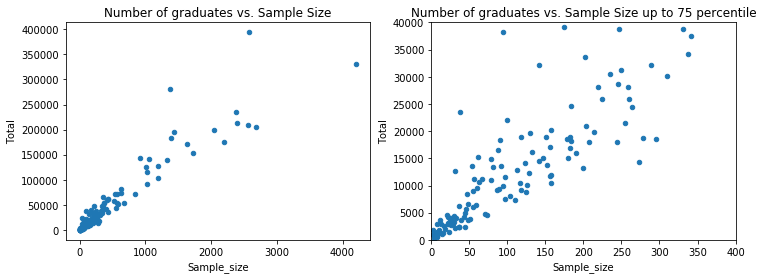

In [7]:
#scatter plot for number of graduates and sample size
fig, axs = plt.subplots(1,2, figsize=(12, 4))
recent_grads.plot(ax=axs[0], x='Sample_size', y='Total', kind='scatter', title='Number of graduates vs. Sample Size')
recent_grads.plot(ax=axs[1], x='Sample_size', y='Total', kind='scatter', title='Number of graduates vs. Sample Size up to 75 percentile', xlim=(0, 400), ylim=(0, 40000))

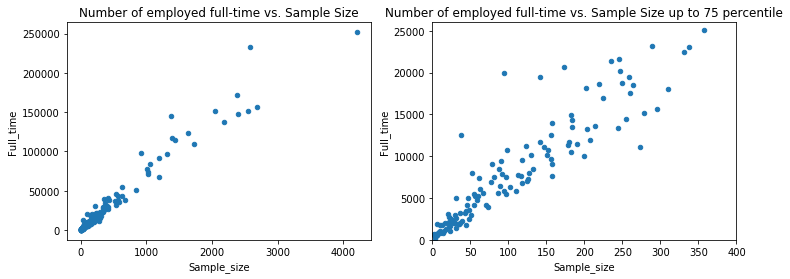

In [8]:
#scatter plot for number of full-time employed and sample size
fig, axs = plt.subplots(1,2, figsize=(12, 4))
recent_grads.plot(ax=axs[0], x='Sample_size', y='Full_time', kind='scatter', title='Number of employed full-time vs. Sample Size')
recent_grads.plot(ax=axs[1], x='Sample_size', y='Full_time', kind='scatter', title='Number of employed full-time vs. Sample Size up to 75 percentile', xlim=(0, 400), ylim=(0, 26000))

There´s quite a strong correlation between these columns. The size of sample groups grows with the popularity of each major.

Let´s check now the distribution of values for sample groups and employed full-time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D597848CC8>,
      dtype=object)

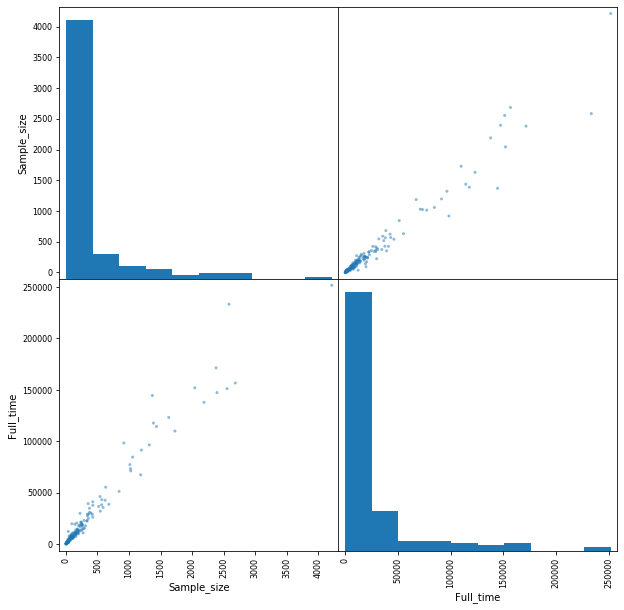

In [9]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size', 'Full_time']], figsize=(10,10))

This scatter matrix is not really informative, as the majority of sample groups are less then 500 and the number of employed full-time for most majors are less then 25000. Let´s check it only for latter majors. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D597953D48>,
      dtype=object)

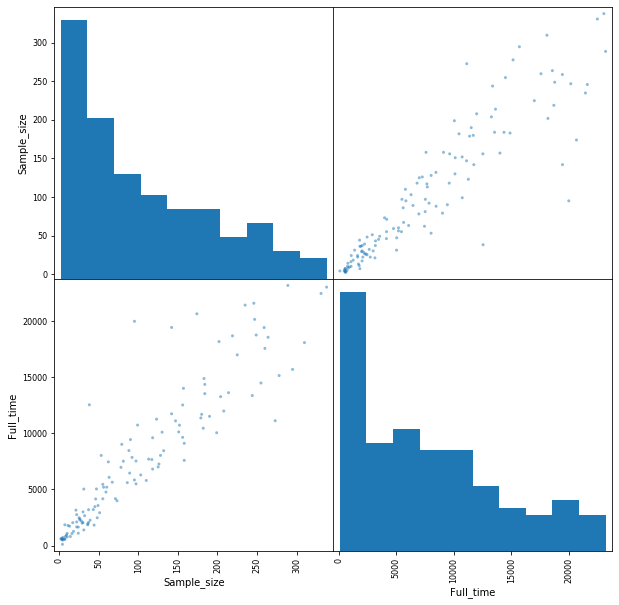

In [10]:
scatter_matrix(recent_grads[recent_grads['Full_time']<25000][['Sample_size', 'Full_time']], figsize=(10,10))


We can see that the sample groups almost for all the majors don´t count with more than 300 respondents, actualy most of them count with less than 50. We can conclude that unfortunately the sample groups are not quite representative. So, while analysing median earnings furthermore, we should always keep in mind that their calculation was based in few respondents only.

## Any strong correlation over here?

Finally, let's try to answer the questions that might be critical for you while choosing a major to study.

We will use scatter plots to answer the following questions:
 - Do students in more popular majors make more money?
 - Is it easier to find job for those who choose less popular majors?
 - Do students that majored in subjects that were majority female make more money?
 - Is there any link between the unemployment rate and the women share for each major?

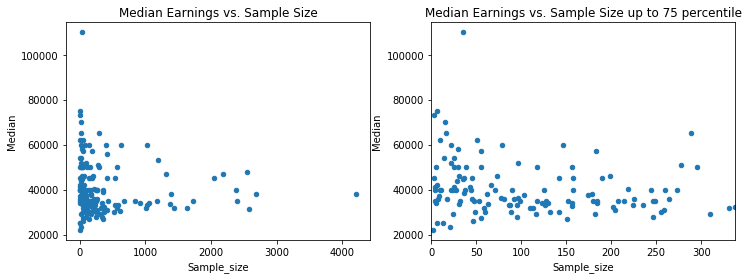

In [11]:
#scatter plot for median earnings and sample size
fig, axs = plt.subplots(1,2, figsize=(12, 4))
recent_grads.plot(ax=axs[0], x='Sample_size',  y='Median', kind='scatter', title='Median Earnings vs. Sample Size')
recent_grads.plot(ax=axs[1], x='Sample_size', y='Median', kind='scatter', title='Median Earnings vs. Sample Size up to 75 percentile', xlim = (0, 338))

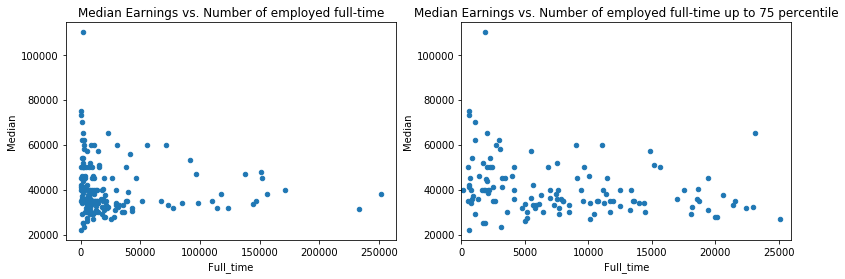

In [12]:
#scatter plot for median earnings and number of employed full-time
fig, axs = plt.subplots(1,2, figsize=(13, 4))
recent_grads.plot(ax=axs[0], x='Full_time',  y='Median', kind='scatter', title='Median Earnings vs. Number of employed full-time')
recent_grads.plot(ax=axs[1], x='Full_time',  y='Median', kind='scatter', title='Median Earnings vs. Number of employed full-time up to 75 percentile', xlim=(0, 26000))

There´s no overall correlation between median earnings and number of grads. One can spot some highest earnings for  majors with fewer students. This could happen due to unrepresantativeness of the sample group.

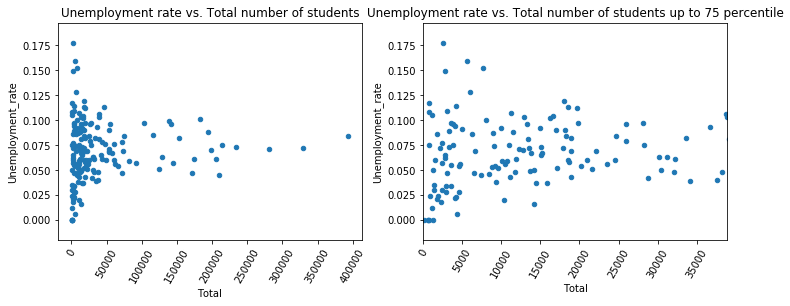

In [13]:
#scatter plot for unemployment rate and sample size
fig, axs = plt.subplots(1,2, figsize=(12, 4))
recent_grads.plot(ax=axs[0], x='Total',  y='Unemployment_rate', kind='scatter', title='Unemployment rate vs. Total number of students', rot=60)
recent_grads.plot(ax=axs[1], x='Total', y='Unemployment_rate', kind='scatter', title='Unemployment rate vs. Total number of students up to 75 percentile', xlim = (0, 38909), rot=60)

The employment probabilities don´t depend on the number of fellows. 

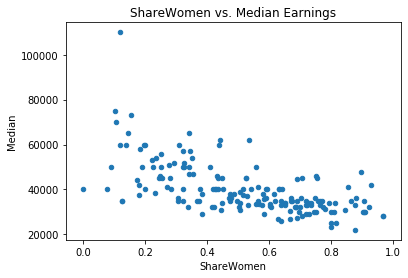

In [14]:
#scatter plot for share of women and median earnings
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='ShareWomen vs. Median Earnings')

There´s a slight correlation between median earnings and the share of women. 

We can confirm it also by checking the proportion of female graduates of 10 most paid and 10 less paid majors.  

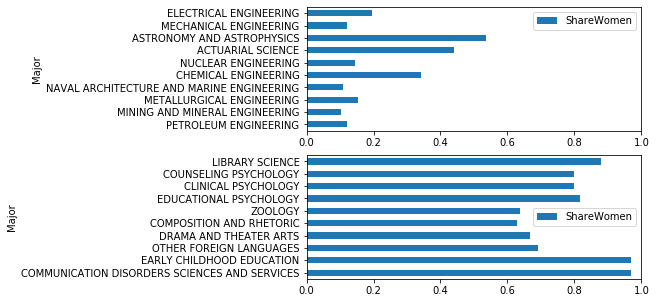

In [15]:
#checking the share of women for 10 most paid and 10 lest paid majors
fig, axs = plt.subplots(2,1, figsize=(6,5))
recent_grads[:10].plot.barh(ax=axs[0], x='Major', y='ShareWomen', xlim=(0,1))
recent_grads[-10:].plot.barh(ax=axs[1], x='Major', y='ShareWomen', xlim=(0,1))

Do you fancy some predominately female major? Don´t get frustrated too fast. Remember that median earnings could be skewed due to the size of sample groups. 

Or some simple explication could take place. Like, for example, the majors (and its subsequent career paths) from the tail of the ranking are less paid for any reason, but it happens to be that at the same time they are more appealling to female students. 

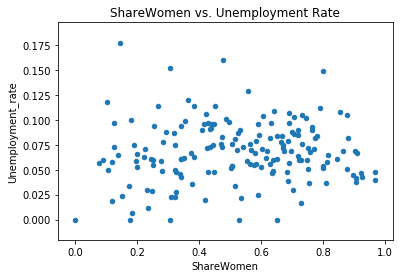

In [16]:
#scatter plot for share of women and unemployment rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment Rate')

No correlation is found between the unemployment rate and the proportion of female graduates which is a good fact, actually.

## What are the most common ranges? or Let´s the 'pragmatic bin' be created

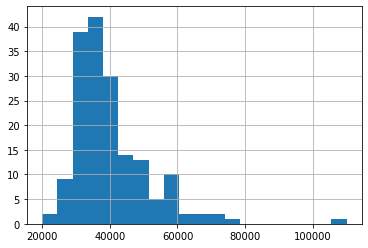

In [17]:
recent_grads['Median'].hist(bins=20, range=(20000,110000))

The median earnings lie in the range of \\$30,000-\\$40,000. Although there´s a handful majors whose graduates earn \\$45,000-$60,000 per year. 

In [18]:
# Seeing which courses have meadian earnings between $50000 and $60000
higher_median_earnings=recent_grads[recent_grads['Median'].between(45000, 60000)]
print(higher_median_earnings.shape[0])
higher_median_earnings.head(10)

40


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
11,12,2401,AEROSPACE ENGINEERING,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,...,2724,8790,794,0.065162,60000,42000,70000,8184,2425,372
12,13,2404,BIOMEDICAL ENGINEERING,14955.0,8407.0,6548.0,Engineering,0.437847,79,10047,...,2694,5986,1019,0.092084,60000,36000,70000,6439,2471,789
13,14,5008,MATERIALS SCIENCE,4279.0,2949.0,1330.0,Engineering,0.310820,22,3307,...,878,1967,78,0.023043,60000,39000,65000,2626,391,81
14,15,2409,ENGINEERING MECHANICS PHYSICS AND SCIENCE,4321.0,3526.0,795.0,Engineering,0.183985,30,3608,...,811,2004,23,0.006334,58000,25000,74000,2439,947,263
15,16,2402,BIOLOGICAL ENGINEERING,8925.0,6062.0,2863.0,Engineering,0.320784,55,6170,...,1983,3413,589,0.087143,57100,40000,76000,3603,1595,524
16,17,2412,INDUSTRIAL AND MANUFACTURING ENGINEERING,18968.0,12453.0,6515.0,Engineering,0.343473,183,15604,...,2243,11326,699,0.042876,57000,37900,67000,8306,3235,640
17,18,2400,GENERAL ENGINEERING,61152.0,45683.0,15469.0,Engineering,0.252960,425,44931,...,7199,33540,2859,0.059824,56000,36000,69000,26898,11734,3192


We´ll add all of them into our 'pragmatic bin' of majors to choose from. 

In [19]:
#adding to the 'pragmatic bin' majors with earnings between $45,000 and $60,000.
pragmatic_bin=recent_grads[recent_grads['Median'].between(45000, 60000)]
print('Number of majors in a bin:', pragmatic_bin.shape[0])

Number of majors in a bin: 40


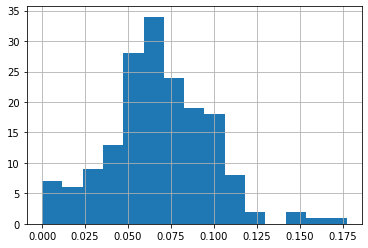

In [20]:
recent_grads['Unemployment_rate'].hist(bins=15)

Mostly the unemployment rate varies between 5-7.5%. There´re some outliers with the unemployment of 14% or more. 

And as we can see below a high unemployment rate can be found both in most paid and less paid majors. 

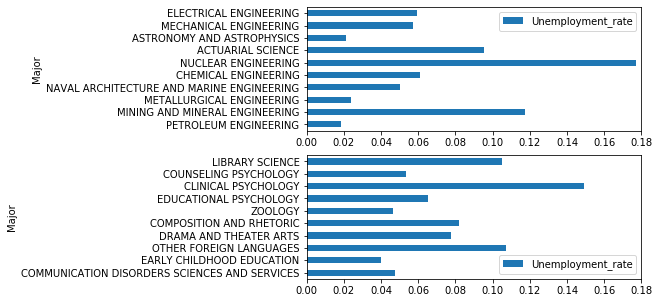

In [21]:
#checking the unemployment rate for 10 most paid and 10 lest paid majors
fig, axs = plt.subplots(2,1, figsize=(6,5))
recent_grads[:10].plot.barh(ax=axs[0], x='Major', y='Unemployment_rate', xlim=(0,0.18))
recent_grads[-10:].plot.barh(ax=axs[1], x='Major', y='Unemployment_rate', xlim=(0,0.18))

Let´s keep in our 'pragmatic bin' only majors with the unemployment lower than 7,5%.

In [22]:
#keeping in the 'pragmatic bin' only the majors with an unemployment rate less than 7,5%
pragmatic_bin=pragmatic_bin[pragmatic_bin['Unemployment_rate']<0.075]
print('Number of majors in a bin:', pragmatic_bin.shape[0])


Number of majors in a bin: 27


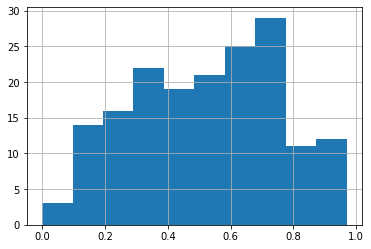

In [23]:
recent_grads['ShareWomen'].hist(bins=10)

It appears that just over 50% of all majors, are majority female, with the highest frequency at 70-80% female.

Let´s keep in our 'pragmatic bin' majors which are neither predominately male nor predominately female with the share of women between 40% and 60%.

In [24]:
#keeping in the 'pragmatic bin' only the majors with share of women between 0,3 and 0,7.
pragmatic_bin=pragmatic_bin[pragmatic_bin['ShareWomen'].between(0.3, 0.7)]
print('Number of majors in a bin:', pragmatic_bin.shape[0])
pragmatic_bin

Number of majors in a bin: 8


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
13,14,5008,MATERIALS SCIENCE,4279.0,2949.0,1330.0,Engineering,0.310820,22,3307,...,878,1967,78,0.023043,60000,39000,65000,2626,391,81
16,17,2412,INDUSTRIAL AND MANUFACTURING ENGINEERING,18968.0,12453.0,6515.0,Engineering,0.343473,183,15604,...,2243,11326,699,0.042876,57000,37900,67000,8306,3235,640
18,19,2403,ARCHITECTURAL ENGINEERING,2825.0,1835.0,990.0,Engineering,0.350442,26,2575,...,343,1848,170,0.061931,54000,38000,65000,1665,649,137
23,24,2413,MATERIALS ENGINEERING AND MATERIALS SCIENCE,2993.0,2020.0,973.0,Engineering,0.325092,22,2449,...,1040,1151,70,0.027789,52000,35000,62000,1911,305,70
27,28,6204,OPERATIONS LOGISTICS AND E-COMMERCE,11732.0,7921.0,3811.0,Business,0.324838,156,10027,...,1183,7724,504,0.047859,50000,40000,60000,1466,3629,285
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
41,42,3700,MATHEMATICS,72397.0,39956.0,32441.0,Computers & Mathematics,0.448099,541,58118,...,18079,33738,2884,0.047277,45000,33000,60000,34800,14829,4569


If you are amongst those who didn´t have any idea what you´d like to study and were looking for some numbers first before choosing your major, we hope that one of these 8 majors sounds appealing to you. Pay your especial attention to the Finance and Accounting, their sample groups are of quite a fair size, so median earnings might be more reliable for these two majors.

Anyway we hope that you are good at maths as all of the majors from our 'pragmatic bin' has got a lot to do with numbers. Not really a STEM person? Stick with us for few minutes more. Below you´ll find a short overview of majors by category.

## Overview of majors by category

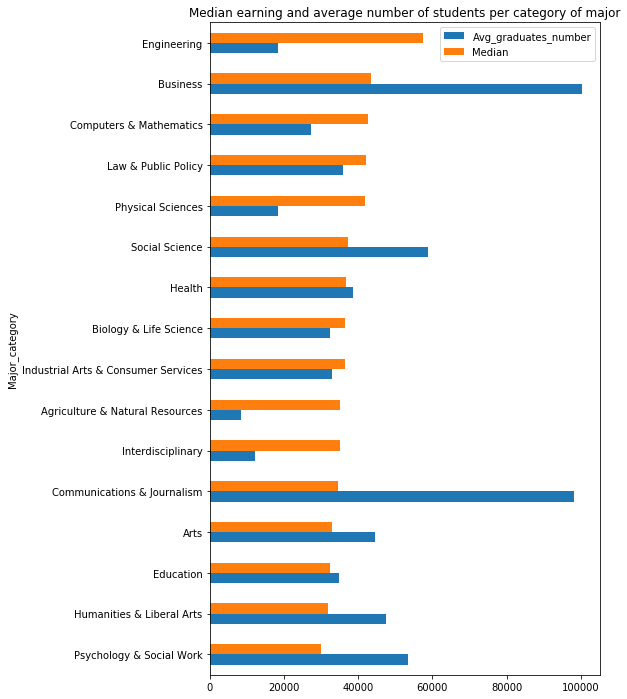

In [25]:
#calculating median earnings by major category
earning_by_category = (recent_grads.groupby('Major_category')['Median']
                             .mean().sort_values().astype(int))

#creating a dataframe for storing information by major category
by_category=pd.DataFrame(earning_by_category, columns=['Median'])
by_category['Avg_graduates_number']=recent_grads.groupby('Major_category')['Total'].mean().astype(int)


by_category[['Avg_graduates_number', 'Median']].plot.barh(figsize=(7,12), title='Median earning and average number of students per category of major')

Business, Communications & Journalism and Social Science majors have got more students on average per major. The first and the last are also among the top 6 better paid career paths. Engineering graduates on average are better paid than any others.

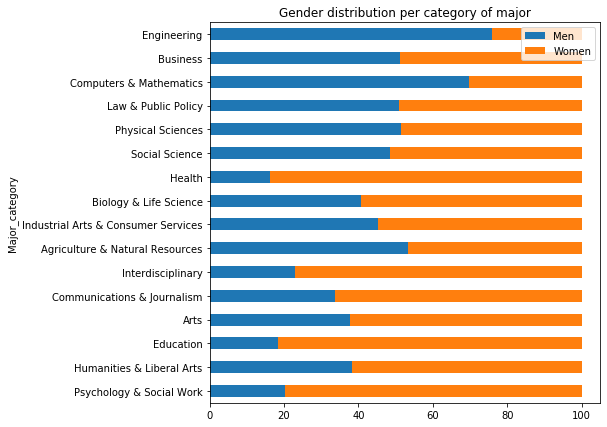

In [26]:
#adding total number of male and female gratuates to the 'by_category' dataframe
by_category['Men']=recent_grads.groupby('Major_category')['Men'].sum().astype(int)
by_category['Women']=recent_grads.groupby('Major_category')['Women'].sum().astype(int)

#calculating the proportions of male and female graduates by major category
gender_distribution = by_category[['Men', 'Women']].apply(lambda x: x*100/sum(x), axis=1)
gender_distribution.plot.barh(stacked=True, figsize=(7,7), title='Gender distribution per category of major')


Business, Law & Public Policy, Physical and Social Sciences, Industrial Arts & Consumer Services and Agriculture & Natural Resources have got almost an even distribution between male and female students.

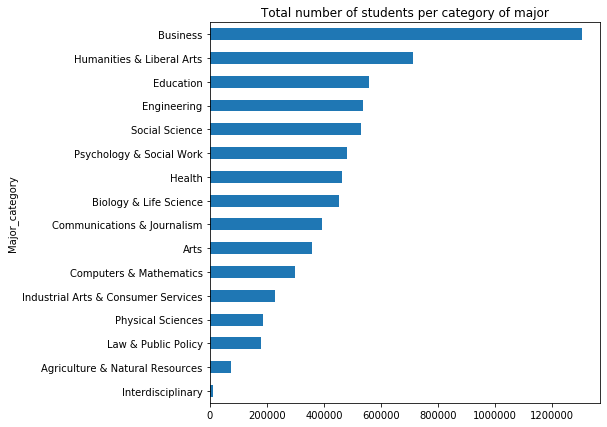

In [27]:
#adding total number of students in each major category
by_category['Total']=recent_grads.groupby('Major_category')['Total'].sum().astype(int)
by_category['Total'].sort_values(ascending=True).plot.barh(figsize=(7,7), title='Total number of students per category of major')

Business is an absolute leader by total number of students.  

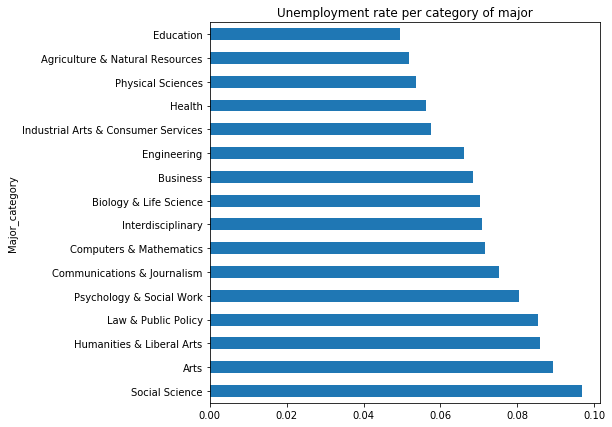

In [28]:
#adding total number of employed and unemployed graduates to 'by_category' dataframe
by_category['Employed']=recent_grads.groupby('Major_category')['Employed'].sum().astype(int)
by_category['Unemployed']=recent_grads.groupby('Major_category')['Unemployed'].sum().astype(int)

#calculating the unemployment rate for each category
by_category['Unemployment_rate'] = by_category[['Unemployed', 'Employed']].apply(lambda x: x/sum(x), axis=1)['Unemployed']
by_category['Unemployment_rate'].sort_values(ascending=False).plot.barh(figsize=(7,7), title='Unemployment rate per category of major')


Maybe the Education grads are not best paid, but definitely it's easier for them to find a job. Third lowest unemployment rate belogns to Physical Sciences which is also in top 5 by median earnings. So, check it out, if you are still in doubts. 

In [29]:
recent_grads[recent_grads['Major_category']=='Physical Sciences']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
39,40,5102,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",2116.0,528.0,1588.0,Physical Sciences,0.750473,31,1778,...,579,1115,137,0.071540,46000,38000,53000,162,1475,124
43,44,5007,PHYSICS,32142.0,23080.0,9062.0,Physical Sciences,0.281936,142,25302,...,8721,14389,1282,0.048224,45000,30000,68000,18674,4576,1823
49,50,5006,OCEANOGRAPHY,2418.0,752.0,1666.0,Physical Sciences,0.688999,36,1638,...,379,1595,99,0.056995,44700,23000,50000,459,996,186
72,73,5000,PHYSICAL SCIENCES,1436.0,894.0,542.0,Physical Sciences,0.377437,10,1146,...,437,653,42,0.035354,40000,30000,55000,530,465,269
74,75,5003,CHEMISTRY,66530.0,32923.0,33607.0,Physical Sciences,0.505141,353,48535,...,15066,29910,2769,0.053972,39000,30000,49900,30382,14718,4288
85,86,5004,GEOLOGY AND EARTH SCIENCE,10972.0,5813.0,5159.0,Physical Sciences,0.470197,78,8296,...,2913,5008,677,0.075449,36200,28000,47000,4858,2792,959
90,91,5005,GEOSCIENCES,1978.0,809.0,1169.0,Physical Sciences,0.591001,18,1441,...,354,1011,36,0.024374,36000,21000,41000,784,591,221
97,98,5098,MULTI-DISCIPLINARY OR GENERAL SCIENCE,62052.0,27015.0,35037.0,Physical Sciences,0.564639,427,46138,...,13133,28966,2727,0.055807,35000,24000,50000,17923,22039,5751
110,111,5002,ATMOSPHERIC SCIENCES AND METEOROLOGY,4043.0,2744.0,1299.0,Physical Sciences,0.321296,32,3431,...,1309,2161,78,0.022229,35000,28000,50000,1808,1317,237


## Conclusion

An interesting analysis has been done. Here our discoveries are:
1. If the only thing you care about is your future earnings, maybe our dataset is not an ideal one. The median earnings here were  calculated using the information of very small sample groups.
2. No correlation was found between neither the median earnings and the popularity nor the popularity and the chances to get employed nor the proportion of female graduates and the unemployment.
3. The only correlation found, a negative slight one, is between the median earnings and the proportion of female graduates. But this correlation might be the consequence of the discovery #1.
4. The median earnings lie in the range of \\$30,000-\\$40,000 (but don´t forget about the discovery #1).
5. The unemployment rate varies from 5% to 7.5%.
6. Just over 50% of all majors are majoritaly female.


Our 'pragmatic bin' of majors with slightly higher median earnings than on average, slightly lower unemployment rate than on average and neither predominatly male nor female gender distribution consists of 8 majors: Material Science, Industrial and Manufacturing Engineering, Architectural Engineering, Materials Engineering and Materials Science, Operations Logistics and E-commerce, Finance, Accounting, Mathematics.

According to the overview of majors per category, the majors of Physical Sciences has got a certain potential as well for pragmatic people.

**DISCLAIMER:** The author of this analysis deeply believe that while choosing your future profession the best thing you can do is to be guided by your heart and not by your mind and especially not by the others. If you are on your place, 'todo saldrá bien' (transl.: everything will be fine) as the Spanish say. 
